<a href="https://colab.research.google.com/github/DwayneLi/Check_Algorithm_Bias_In_Hiring/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## import packages and prepare data



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip -q install pyreadstat
!wget -q https://www.dropbox.com/s/7rd15y2jdam5wls/carsales.sav
!wget -q https://www.dropbox.com/s/0ctjebkulbqv23z/Professional_Sales_Applicants.sav

     |████████████████████████████████| 2.0MB 8.8MB/s 


In [ ]:
df= pd.read_spss('carsales.sav')
test= pd.read_spss("Professional_Sales_Applicants.sav")

In [ ]:
# Check null values
df.isnull().sum()
# We can see there're 141 observations have null values.

CandidateID                    141
AgeBand                          0
Race                             0
Gender                           0
QualityofHirePoint               0
OverallRating                   66
Accommodation_tile             141
Assertiveness_tile             141
CautiousThinking_tile          141
Competitiveness_tile           141
CriticismTolerance_tile        141
DetailInterest_tile            141
FollowThrough_tile             141
InterpersonalInsight_tile      141
Multitasking_tile              141
ObjectiveThinking_tile         141
Optimism_tile                  141
PositiveViewofPeople_tile      141
PreferenceforStructure_tile    141
ProcessFocused_tile            141
WorkIntensity_tile             141
RealisticThinking_tile         141
ReflectiveThinking_tile        141
Sociability_tile               141
SocialRestraint_tile           141
WorkIndependence_tile          141
dtype: int64

In [ ]:
# remove null values
df=df.dropna()
test=test.dropna()

In [ ]:
df.head()

,CandidateID,AgeBand,Race,Gender,QualityofHirePoint,OverallRating,Accommodation_tile,Assertiveness_tile,CautiousThinking_tile,Competitiveness_tile,CriticismTolerance_tile,DetailInterest_tile,FollowThrough_tile,InterpersonalInsight_tile,Multitasking_tile,ObjectiveThinking_tile,Optimism_tile,PositiveViewofPeople_tile,PreferenceforStructure_tile,ProcessFocused_tile,WorkIntensity_tile,RealisticThinking_tile,ReflectiveThinking_tile,Sociability_tile,SocialRestraint_tile,WorkIndependence_tile
142,216867.0,50-59,White (not Hispanic or Latino),Female,4654.229948,3.956234,0.6306,0.1433,0.2266,0.1587,0.1795,0.1587,0.1016,0.3058,0.5656,0.0783,0.1817,0.5524,0.6237,0.2459,0.2437,0.5804,0.4169,0.2782,0.3556,0.1446
143,216871.0,Prefer Not To Say,Prefer Not To Say,Male,7916.685203,4.126192,0.9332,0.6590,0.7606,0.8607,0.9397,0.5000,0.7073,0.9322,0.2791,0.7475,0.8623,0.9336,0.7514,0.5263,0.6783,0.1008,0.8183,0.9293,0.9026,0.0485
144,216888.0,60 or over,White (not Hispanic or Latino),Male,6089.487528,3.491681,0.2023,0.1433,0.0228,0.7692,0.4162,0.3085,0.0509,0.4207,0.0036,0.1099,0.0729,0.6060,0.2189,0.1052,0.2437,0.8962,0.9461,0.3843,0.0208,0.7054
145,216902.0,50-59,White (not Hispanic or Latino),Female,3346.473647,4.959874,0.8413,0.0597,0.2940,0.7131,0.6893,0.0030,0.0729,0.8097,0.0907,0.3193,0.8183,0.2447,0.1849,0.1052,0.4085,0.5804,0.2646,0.8484,0.5000,0.1446
147,216923.0,50-59,American Indian or Alaska Native (not Hispanic...,Male,-1650.335820,2.869503,0.3085,0.9945,0.6915,0.7131,0.4859,0.5000,0.7665,0.7652,0.6792,0.1497,0.5721,0.1075,0.4326,0.5263,0.5000,0.5804,0.6878,0.7218,0.1333,0.5557


# Visualization

In [ ]:
sns.set_context("talk", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15}) 
sns.set_style(style='ticks')

## OverallRating

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


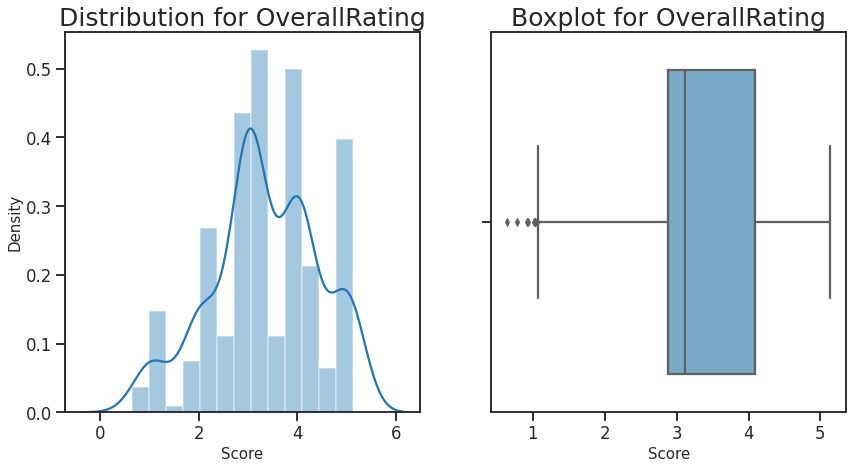

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,7))
sns.distplot(df['OverallRating'],ax=ax[0])
ax[0].set_title('Distribution for OverallRating')
ax[0].set_xlabel('Score')

sns.boxplot(x=df["OverallRating"],ax=ax[1],palette='Blues')
ax[1].set_title('Boxplot for OverallRating')
ax[1].set_xlabel('Score')

plt.show()

### The Overall Rating is concentrated on 3 to 4 score. There are some extreme low rating data below 1.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


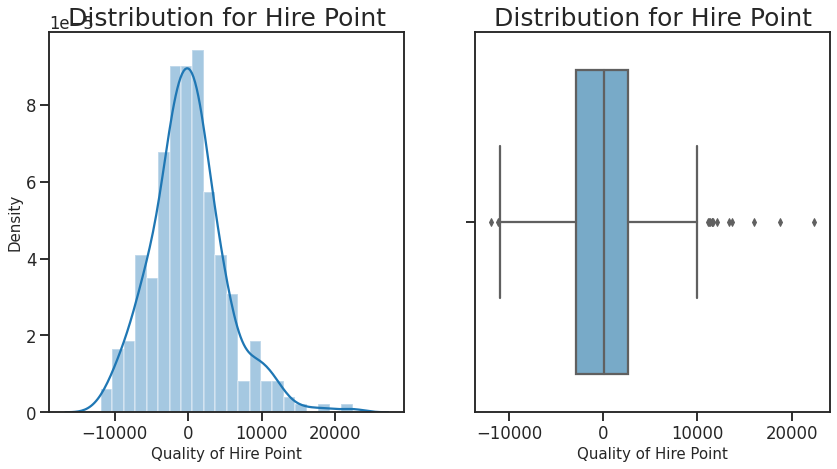

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,7))
sns.distplot(df['QualityofHirePoint'],ax=ax[0])
ax[0].set_title('Distribution for Hire Point')
ax[0].set_xlabel('Quality of Hire Point')

sns.boxplot(x=df['QualityofHirePoint'],ax=ax[1],palette='Blues')
ax[1].set_title('Distribution for Hire Point')
ax[1].set_xlabel('Quality of Hire Point')

plt.show()

### Hire point distribution shows a right skewed distribution, there are many outliers larger than 10000 hire points.

## Protected attributes

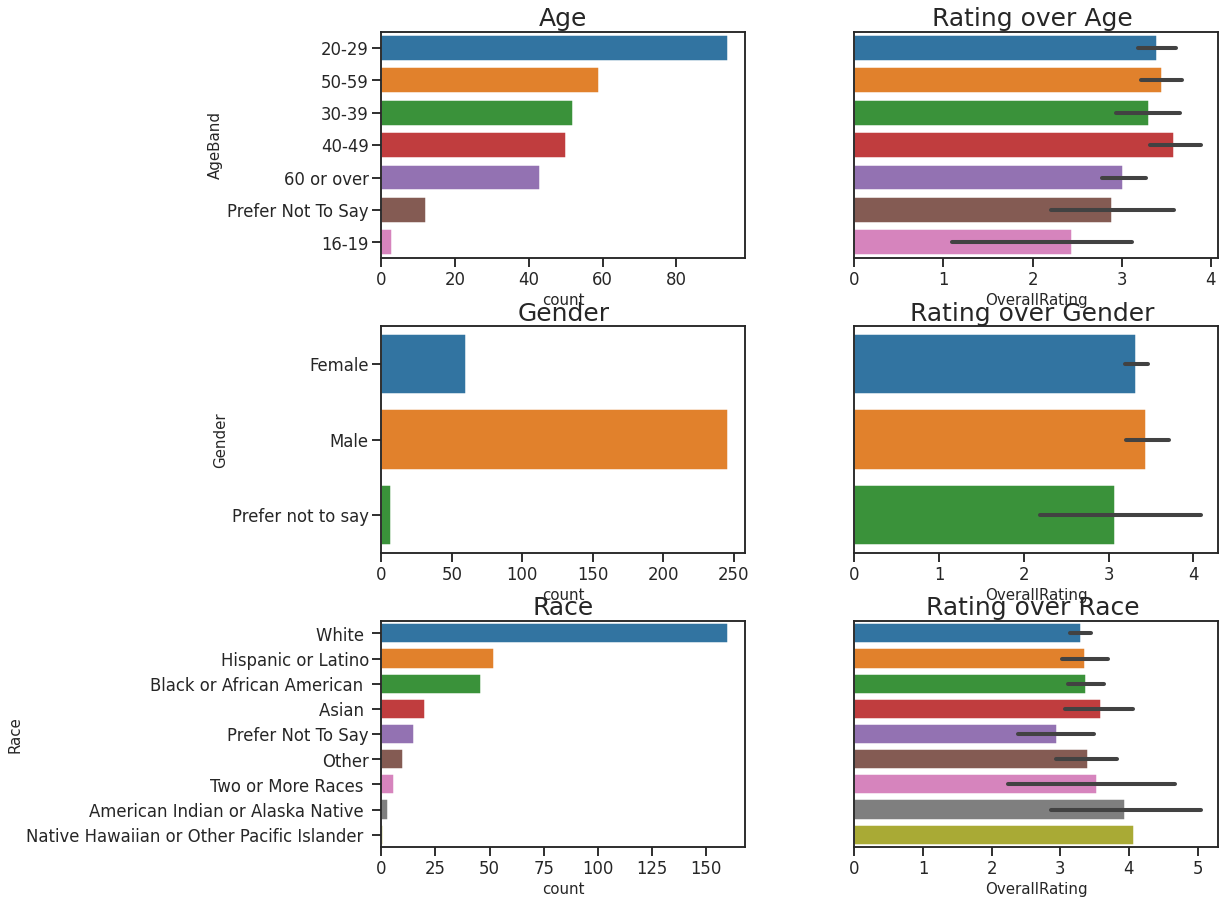

In [ ]:
# Remove replicate string from race categories
df.Race=df['Race'].str.replace('not Hispanic or Latino','')
df.Race=df.Race.str.strip('()')

#Bar chart 
f,ax=plt.subplots(3,2,figsize=(15,15))
sns.countplot(y='AgeBand',data=df,ax=ax[0,0],order=df['AgeBand'].value_counts().index)
ax[0,0].set_title('Age')

sns.barplot(y="AgeBand", x="OverallRating", data=df, ax=ax[0,1],order=df['AgeBand'].value_counts().index)
ax[0,1].set_yticks([])
ax[0,1].set_ylabel('')
ax[0,1].set_title('Rating over Age ')

count=sns.countplot(y='Gender',data=df,ax=ax[1,0])
ax[1,0].set_title('Gender')

sns.barplot(y="Gender", x="OverallRating", data=df, ax=ax[1,1],order=df['Gender'].value_counts().index)
ax[1,1].set_yticks([])
ax[1,1].set_ylabel('')
ax[1,1].set_title('Rating over Gender ')

sns.countplot(y='Race',data=df,ax=ax[2,0],order=df['Race'].value_counts().index)
ax[2,0].set_title('Race')

sns.barplot(y="Race", x="OverallRating", data=df, ax=ax[2,1],order=df['Race'].value_counts().index)
ax[2,1].set_yticks([])
ax[2,1].set_ylabel('')
ax[2,1].set_title('Rating over Race ')

plt.subplots_adjust(hspace = 0.3, wspace=0.3)
plt.show()

### Except for those categories with fewer people, these plots dosen't imply much different in rating among categories in gender, age and race.

## Other exploratory plot

Text(0.5, 1.0, 'The Age Distribution For Men and Women')

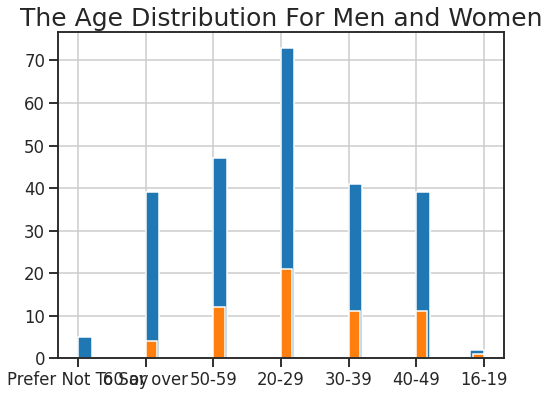

In [ ]:
female_w = df[df['Gender']=='Female']['AgeBand'].dropna()
male_w = df[df['Gender']=='Male']['AgeBand'].dropna()
fig = plt.figure(figsize=(8,6))
male_w.hist(bins=30)
female_w.hist(bins=30)
plt.title('The Age Distribution For Men and Women')

Text(0.5, 1.0, 'Gender in Rating & Hire Point')

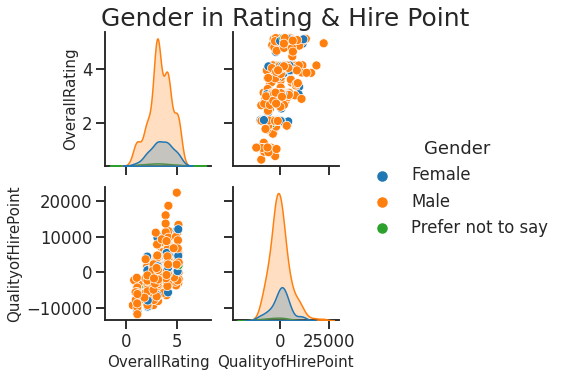

In [ ]:
# Pair Plot of Gender with OverallRating and Qualityof HirePoint
new_df = df[['OverallRating','QualityofHirePoint','Gender']]
g= sns.pairplot(data = new_df, hue="Gender")
plt.title('Gender in Rating & Hire Point')

## Distribution plot of each test

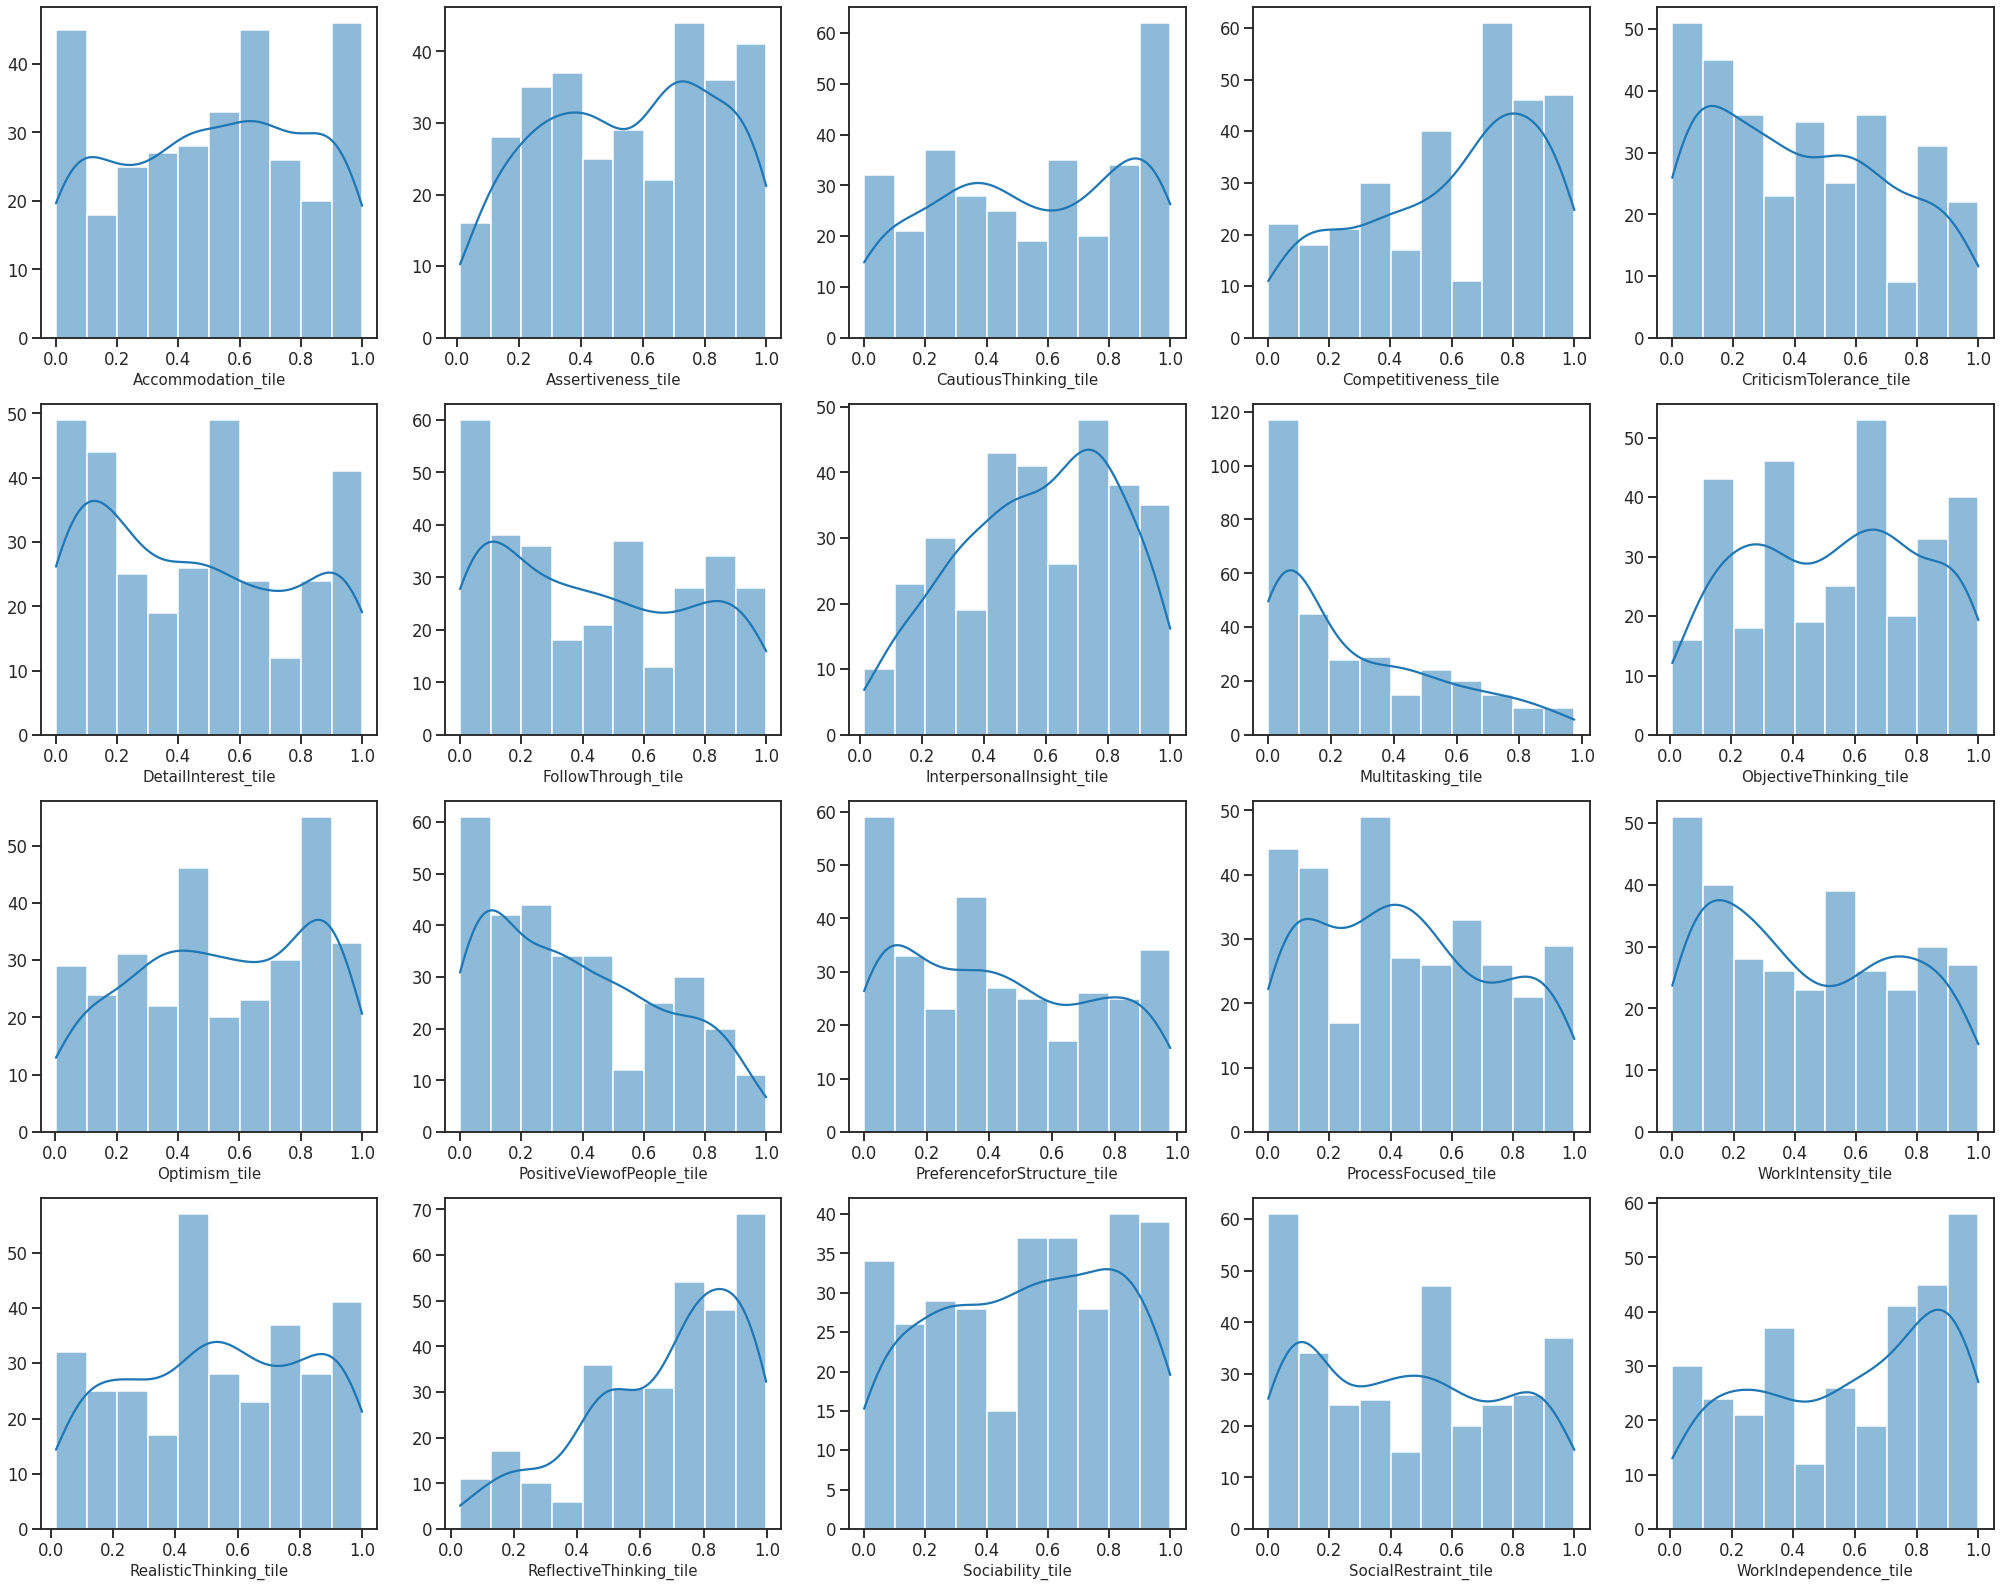

In [ ]:
f,ax=plt.subplots(4,5,figsize=(35,28))
row,col=0,0
for var in df.columns[6:]:
  sns.histplot(df[var],ax=ax[row,col],kde='True')
  ax[row,col].set_ylabel('')
  col+=1
  if col ==5:
    row+=1
    col=0  
#sns.distplot(df['Accommodation_tile'],ax=ax[0,0])

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Plot conditional distributions between original system's attitude - 'Recommend' or 'pool'- and we can see the difference.

We display  20 percentile distributions we can see that in some attributes, recommend candidates are more likely to have a  higher rank while poor candidates are not. For instance, the Assertiveness distribution, the second graph in the first row, implies recommend candidates have a peak near 100 percentile, while the last graph of row 3, the realistic thinking distribution, recommend candidates have no much difference in distribution comparing to poor candidates.

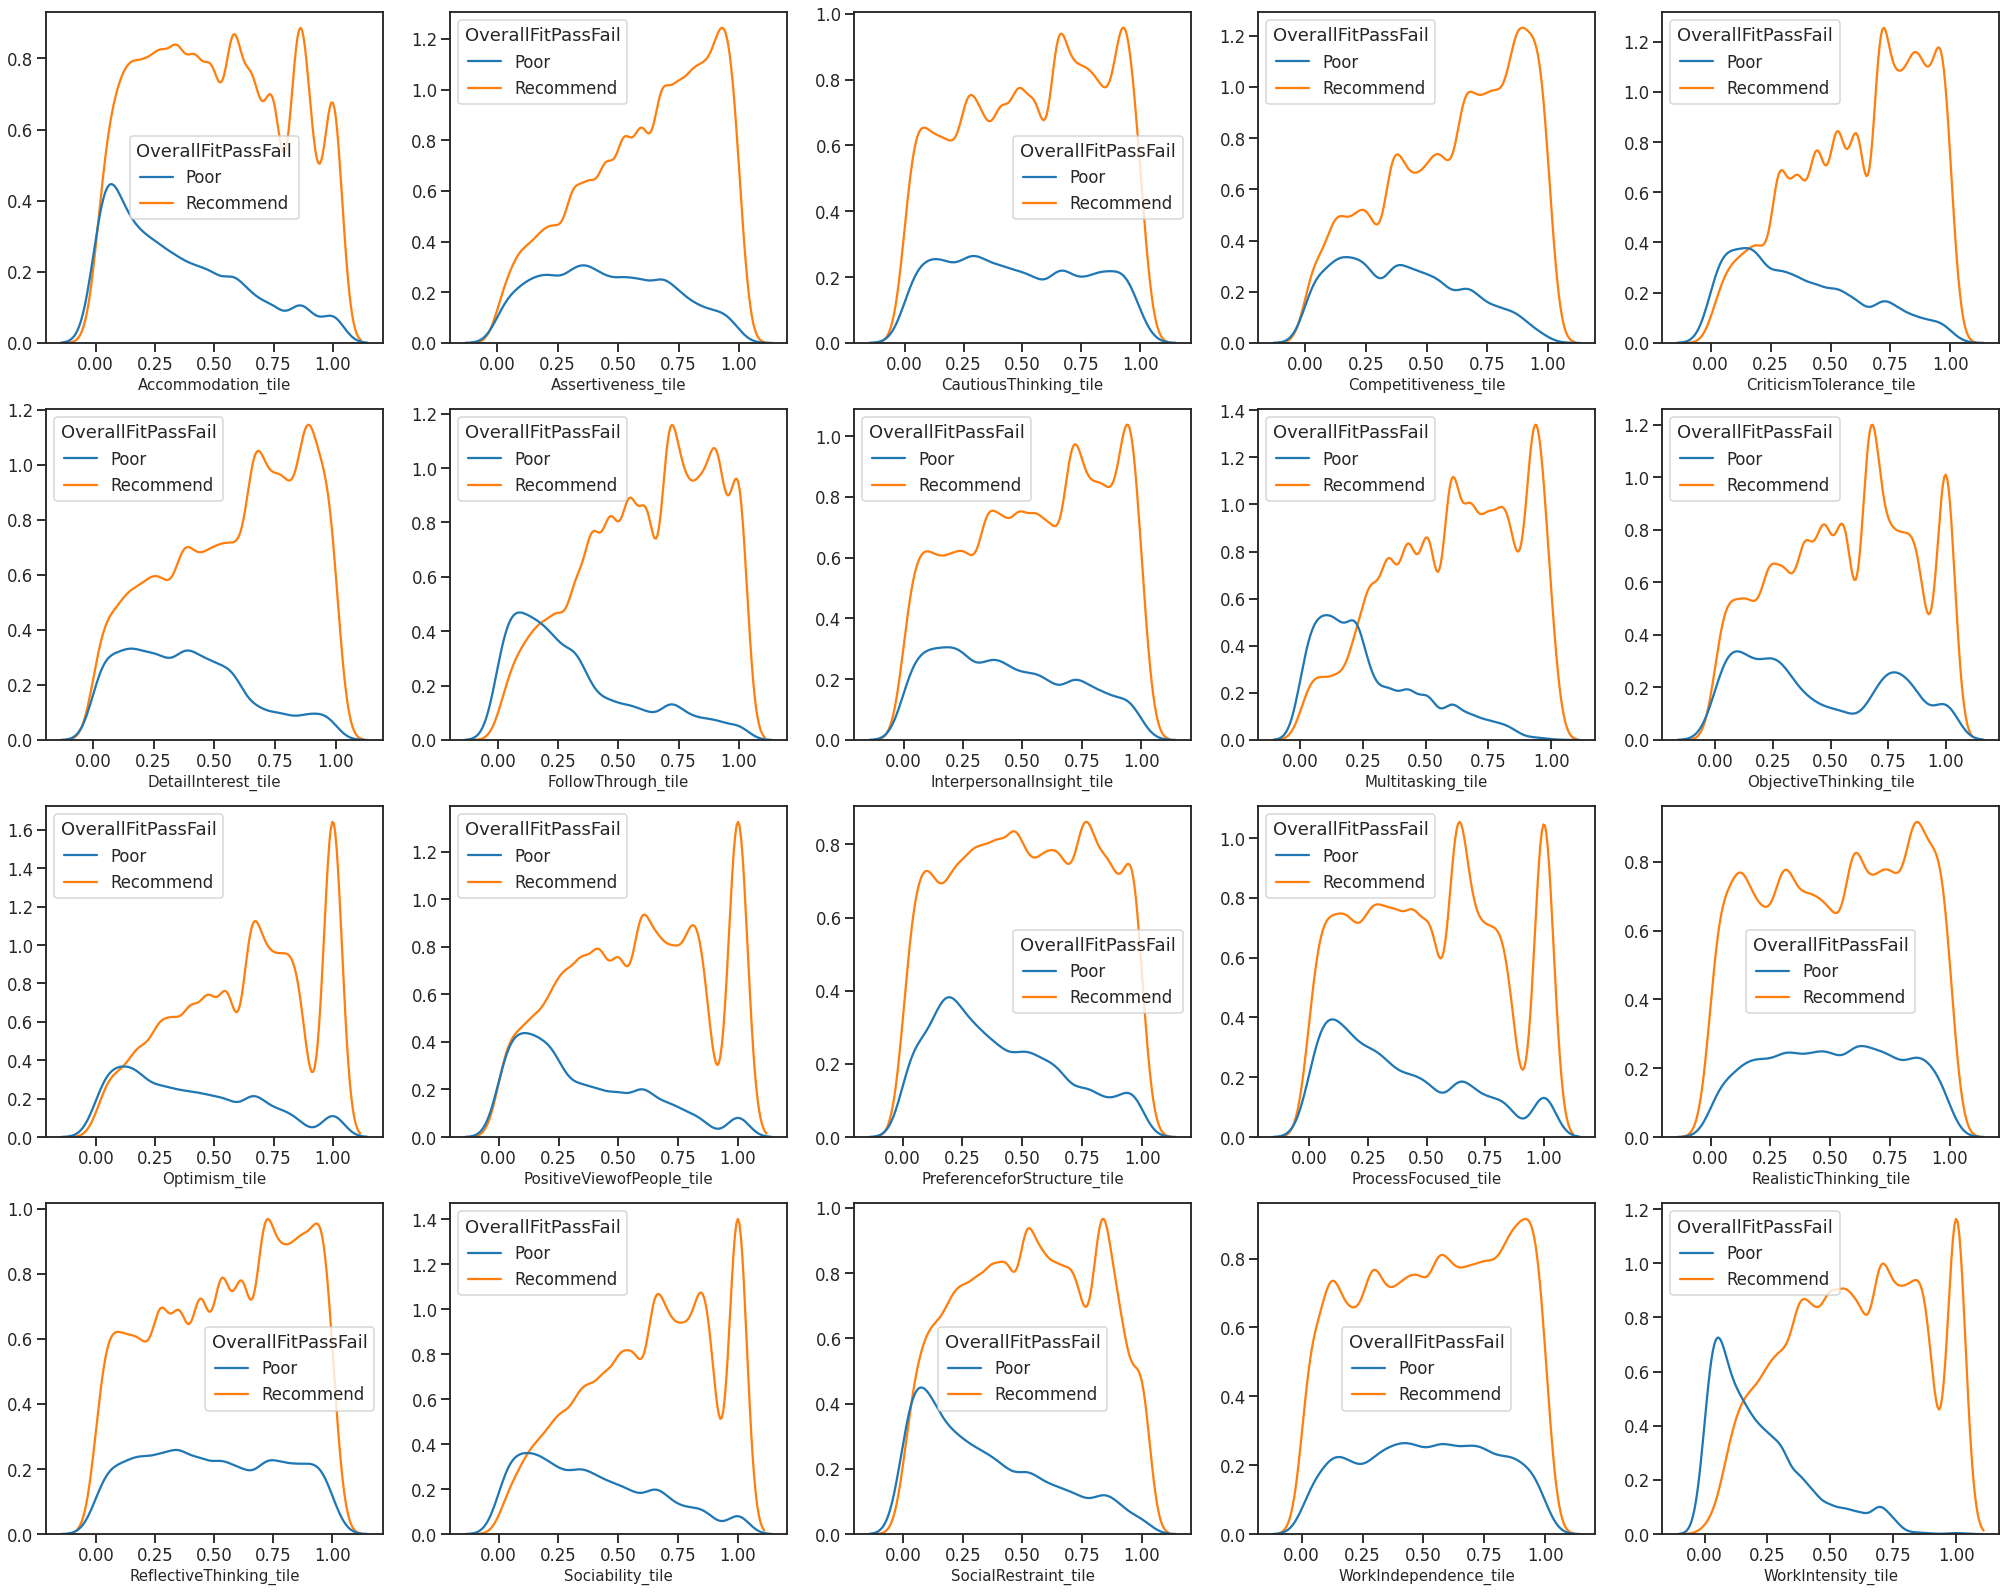

In [ ]:
f,ax=plt.subplots(4,5,figsize=(35,28))
row,col=0,0
for var in test.columns[15:]:
  #sns.kdeplot(data=test, x='Accommodation_tile',hue='OverallFitPassFail')
  sns.kdeplot(data=test, x=var,ax=ax[row,col],hue='OverallFitPassFail')
  ax[row,col].set_ylabel('')
  col+=1
  if col ==5:
    row+=1
    col=0
